<a href="https://colab.research.google.com/github/HsnTmjd/ML-projects/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [70]:
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [71]:
loan_dataset.head()
loan_dataset.shape

(614, 13)

In [72]:
# finding the null values
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [73]:
# droping the missing values
loan_dataset = loan_dataset.fillna(0)

In [74]:
# lebel encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [75]:
# dependent value counts
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51
0,15


In [76]:
# replacing the 3+ with 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)


In [77]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
4,51
0,15


<Axes: xlabel='Education', ylabel='count'>

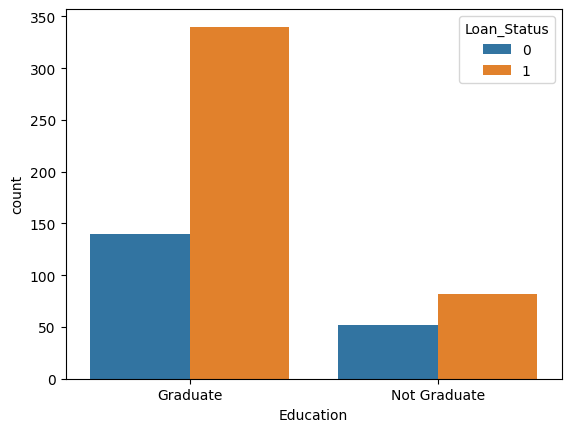

In [78]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

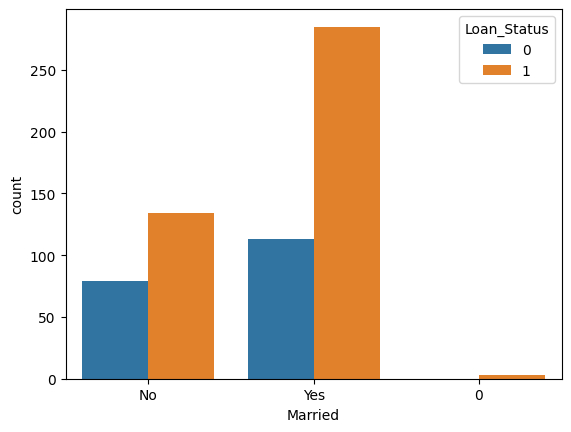

In [79]:
# on the vasis of merital status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [92]:
# converting the catagorical values with numbers
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1}, 'Education':{'Graduate':1, 'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}}, inplace=True)

In [94]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,0.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [95]:
# spliting the data
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [96]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [98]:
classifier = svm.SVC(kernel='linear')

In [99]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [100]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.769927536231884


In [101]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7419354838709677
